In [2]:
# importando as bibliotecas e classes
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics as m
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
#from math import abs

In [3]:
#importando os dados
data = pd.read_csv("dados_desmatamento.csv")
#dados.dropna()
# dados = pd.get_dummies(dados_brutos)

In [4]:
data.head()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [5]:
#Separa features(matriz X:colunas usadas para fazer a predição) de target (coluna y:coluna se quer prever)
target = "AMZ LEGAL"
X = data.drop([target], axis=1)
y = data[target]

In [21]:
y

0     27772
1     19014
2     14286
3     11651
4     12911
5      7464
6      7000
7      6418
8      4571
9      5891
10     5012
11     6207
12     7893
13     6947
14     7536
15     9762
Name: AMZ LEGAL, dtype: int64

In [6]:
#Gera dados de teste e de treino
#train_test_split: separar a base de treino e teste
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.5, random_state=0)
xTrain

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO
10,2014,309,500,31,257,1075,1887,684,219,50
7,2011,280,502,66,396,1120,3008,865,141,40
15,2019,688,1421,8,215,1685,3862,1245,617,21
11,2015,264,712,25,209,1601,2153,1030,156,57
3,2007,184,610,39,631,2678,5526,1611,309,63
0,2004,728,1232,46,755,11814,8870,3858,311,158
5,2009,167,405,70,828,1049,4281,482,121,61
12,2016,372,1129,17,258,1489,2992,1376,202,58


In [24]:
yTest

1     19014
6      7000
8      4571
9      5891
13     6947
4     12911
2     14286
14     7536
Name: AMZ LEGAL, dtype: int64

In [7]:
#Define classificador utilizado e treina
classifier = LinearRegression()
classifier.fit(xTrain, yTrain)

#Faz predicao com o modelo de teste
yPred = classifier.predict(xTest)

#Verificar a precisão do modelo
prediction_relative_error = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred,yTest))]
prediction_relative_error

[0.6073200253008847,
 0.1326774209346695,
 0.34089679806011236,
 0.28219226615036025,
 0.08965777178906342,
 1.472065295120009,
 0.048433272351739616,
 0.3583357268622574]

In [8]:
yPred,xTest

(array([18898.52417039,  6990.71258053,  4586.58239264,  5874.3760536 ,
         6953.22852541, 12720.94164975, 14279.08082271,  7563.00418038]),
     Ano/Estados   AC    AM   AP    MA    MT    PA    RO   RR   TO
 1          2005  592   775   33   922  7145  5899  3244  133  271
 6          2010  259   595   53   712   871  3770   435  256   49
 8          2012  305   523   27   269   757  1741   773  124   52
 9          2013  221   583   23   403  1139  2346   932  170   74
 13         2017  257  1001   24   265  1561  2433  1243  132   31
 4          2008  254   604  100  1271  3258  5607  1136  574  107
 2          2006  398   788   30   674  4333  5659  2049  231  124
 14         2018  444  1045   24   253  1490  2744  1316  195   25)

'\nPlotar xTeste, yTeste e yPred. Com isto, será possível visualizar graficamente \no quão distante do valor real está o resultado do modelo.\n\nObservação: Para que o gráfico fique legível, é importante que os dados estejam ordenados\npelo ano. Isso foi feito para xTest e yTest, que agora são xTestSorted e yTestSorted.\nFalta fazer para o yPred (yPredSorted)\n\nExemplo do plot:\nplt.plot(xTestSorted, yTestSorted, xTestSorted, yPredSorted)\n'

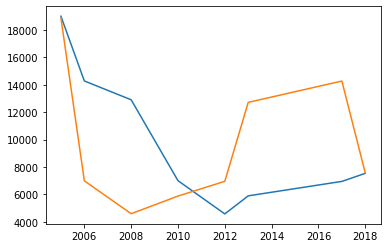

In [12]:
#Ordenar a base de testes por ano
xTestSorted = xTest.sort_values(by=["Ano/Estados"])["Ano/Estados"]
yTestSorted = [yTest[index] for index in xTestSorted.index]
#yPredSorted = [yPred[index] for index in xTestSorted.index]

plt.plot(xTestSorted,yTestSorted,xTestSorted,yPred)
#plt.plot(xTestSorted,yPred)
#Proximos passos
'''
Plotar xTeste, yTeste e yPred. Com isto, será possível visualizar graficamente 
o quão distante do valor real está o resultado do modelo.

Observação: Para que o gráfico fique legível, é importante que os dados estejam ordenados
pelo ano. Isso foi feito para xTest e yTest, que agora são xTestSorted e yTestSorted.
Falta fazer para o yPred (yPredSorted)

Exemplo do plot:
plt.plot(xTestSorted, yTestSorted, xTestSorted, yPredSorted)
'''

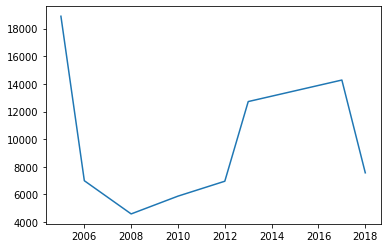

In [11]:
plt.plot(xTestSorted,yPred)

In [ ]:
xTestSorted,yTestSorted,yPred

In [25]:
df_teste = xTest.copy()
df_teste['prediction'] = yPred
df_teste['relative_error'] = prediction_relative_error
df_teste['AMZ LEGAL'] = yTest
df_teste

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,prediction,relative_error,AMZ LEGAL
1,2005,592,775,33,922,7145,5899,3244,133,271,18898.524170,0.607320,19014
6,2010,259,595,53,712,871,3770,435,256,49,6990.712581,0.132677,7000
8,2012,305,523,27,269,757,1741,773,124,52,4586.582393,0.340897,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5874.376054,0.282192,5891
13,2017,257,1001,24,265,1561,2433,1243,132,31,6953.228525,0.089658,6947
4,2008,254,604,100,1271,3258,5607,1136,574,107,12720.941650,1.472065,12911
2,2006,398,788,30,674,4333,5659,2049,231,124,14279.080823,0.048433,14286
14,2018,444,1045,24,253,1490,2744,1316,195,25,7563.004180,0.358336,7536


In [46]:
df_teste.set_index('Ano/Estados',inplace = True)

In [47]:
df_teste

,AC,AM,AP,MA,MT,PA,RO,RR,TO,prediction,relative_error,AMZ LEGAL
Ano/Estados,,,,,,,,,,,,
2005,592,775,33,922,7145,5899,3244,133,271,18898.524170,0.607320,19014
2010,259,595,53,712,871,3770,435,256,49,6990.712581,0.132677,7000
2012,305,523,27,269,757,1741,773,124,52,4586.582393,0.340897,4571
2013,221,583,23,403,1139,2346,932,170,74,5874.376054,0.282192,5891
2017,257,1001,24,265,1561,2433,1243,132,31,6953.228525,0.089658,6947
2008,254,604,100,1271,3258,5607,1136,574,107,12720.941650,1.472065,12911
2006,398,788,30,674,4333,5659,2049,231,124,14279.080823,0.048433,14286
2018,444,1045,24,253,1490,2744,1316,195,25,7563.004180,0.358336,7536


<AxesSubplot:xlabel='Ano/Estados'>

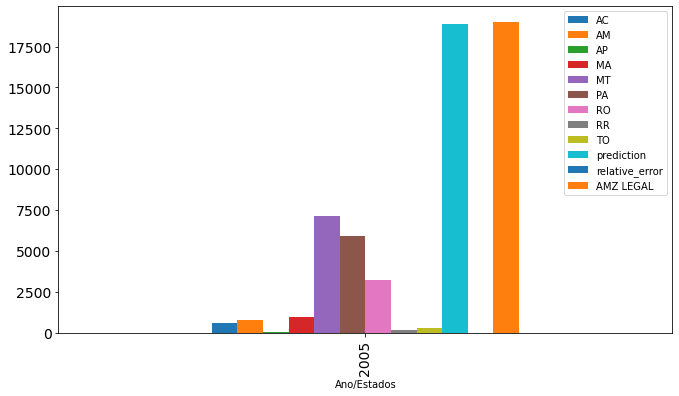

In [52]:
df_teste.loc[df_teste.index==2005].plot.bar(figsize = (11,6),fontsize=14)

In [61]:
#Métricas de Performance
#Dados de teste
mae_test = m.mean_absolute_error(yTest,yPred)
mape_test = np.mean(np.abs(yTest-yPred)/yTest)

In [62]:
#Verificar o MAE - Curso #Erro Percentual Médio Absoluto (MAPE)
data = {
    'DataFrame':['test'],
    'MAE':[mae_test],
    'MAPE':[mape_test]
}
df_mp = pd.DataFrame(data)
df_mp
#Nos dados de teste, a cada predição que fizer o modelo pode estar 0.4% errado

,DataFrame,MAE,MAPE
0,test,48.397478,0.004164


In [ ]:
#x = [1,2,3]
#y1 = [1,2,3]
#y2 = [1,4,6]

#plt.plot(x, y1, x,y2)